In [1]:
from database import Database
from Filter.PB import PB
from Filter.MA import MA
from Filter.PB_MA import PB_MA
from Filter.Higher_Market import Higher_Market
from Filter.DoubleRateRise import DoubleRateRise
from Filter.ROE_H_PB_L import ROE_H_PB_L
from Filter.Chips import Chips
from Filter.GetFilterData import GetFilterData
from Utils.GetExtraX import GetExtraX
from FeatureSelect.FeatureSelect import FeatureSelect
from FeatureSelect.FeatureXMLGenerate import FeatureXMLGenerate
from Draw.draw import Draw
from Draw.StockDataVisualizer import StockDataVisualizer

In [2]:
class DataStorage:
    def __init__(self):
        self.filtered_data = None
        self.features = None

In [3]:
def F_Draw(filtered_data,features,*xml):
    key_list = list(features.keys())
    Draw(filtered_data,key_list,*xml)

In [4]:
def Analysis(func_name,start_d,end_d,*xml):
    data_storage = DataStorage()
    # 讀取資料
    db = Database()
    # #TODO:一次取完變成data?
    # stock_data = db.get_stock(start_d,end_d).drop('id', axis=1)
    company_data =db.get_company_basic()
    q_data=db.get_finance_report_q()
    m_data=db.get_finance_report_m()
    s_data = db.get_stock(start_d,end_d)
    mk_data = db.get_market_index(start_d,end_d)
    ch_data = db.get_chips(start_d,end_d)

    #選擇策略+防呆
    if func_name == "F_PB":
        selected_companies = PB(q_data)

    elif func_name == "F_DoubleRateRise":
        selected_companies = DoubleRateRise(q_data,start_d)
        
    elif func_name == "F_Chips":
        selected_companies = Chips(ch_data,*xml)

    elif func_name == "F_MA":
        selected_companies = MA(s_data)

    elif func_name == "F_PB_MA":
        selected_companies = PB_MA(q_data,start_d,s_data)
        
    elif func_name == "F_Higher_Market":
        selected_companies = Higher_Market(s_data,company_data,mk_data,start_d,end_d)

    elif func_name == "F_ROE_H_PB_L":
        selected_companies = ROE_H_PB_L(q_data,company_data)

    else:
        return "請選擇合適篩選標準"
    combine = GetFilterData(company_data,m_data,q_data,s_data,mk_data,ch_data,selected_companies,start_d,end_d)
    filtered_data=combine.getFliterData()

    # with pd.ExcelWriter('filtered_data.xlsx', engine='openpyxl') as writer:
    #     filtered_data.to_excel(writer, index=False, sheet_name='Sheet1')
    
    print(f"符合條件股數:{len(filtered_data)}")

    visualizer = StockDataVisualizer(filtered_data)
    visualizer.get_heat_map_all()
    visualizer.get_industry_pie_all()
    visualizer.get_bar_chart_all()
   
    if xml:
        addX_data = GetExtraX(filtered_data,xml[0])
    else:
        addX_data = filtered_data

    features = FeatureSelect(addX_data)

    FeatureXMLGenerate(features)
    
    data_storage.features, data_storage.filtered_data = features, filtered_data
    return features, filtered_data
    

c:\Users\User\Desktop\中央資管\論文\自己的論文\Data_Browsing\database.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_from_db.rename(columns=self.column_mapping, inplace=True)
c:\Users\User\Desktop\中央資管\論文\自己的論文\Data_Browsing\database.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_from_db.rename(columns=self.column_mapping, inplace=True)
c:\Users\User\Desktop\中央資管\論文\自己的論文\Data_Browsing\database.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

符合條件股數:56


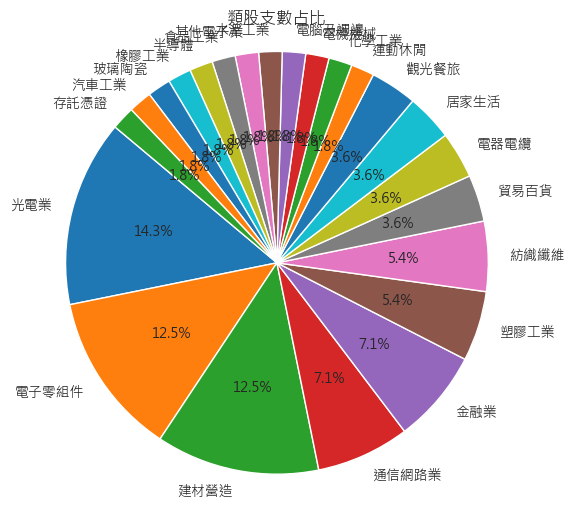

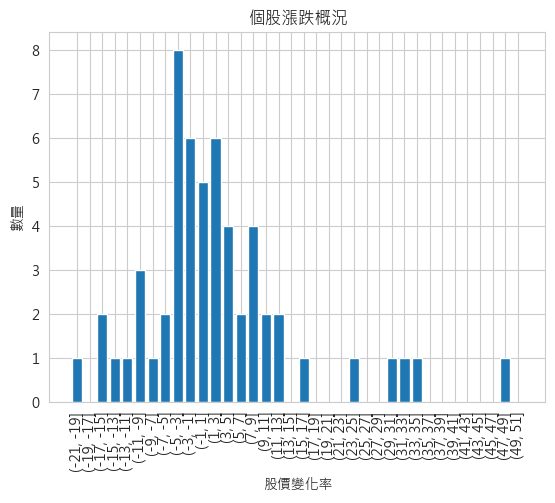

區間融資餘額(張)變化率
融券增減比率
融資增減比率
區間融資餘額(張)變化
券資比
{'區間融資餘額(張)變化率': '數值', '融券增減比率': '數值', '融資增減比率': '數值', '區間融資餘額(張)變化': '數值', '券資比': '數值'}


c:\Users\User\Desktop\中央資管\論文\自己的論文\Data_Browsing\FeatureSelect\FeatureSelect.py:28: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

c:\Users\User\Desktop\中央資管\論文\自己的論文\Data_Browsing\FeatureSelect\FeatureSelect.py:28: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

c:\Users\User\Desktop\中央資管\論文\自己的論文\Data_Browsing\FeatureSelect\FeatureSelect.py:28: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once us

In [5]:

# features, filtered_data = Analysis("F_DoubleRateRise",'2023/04/01','2023/07/01','XML_chip1031.xml')
#可行的
# features, filtered_data = Analysis("F_DoubleRateRise",'2023/05/16','2023/07/17')#3換成3*3

#可能可以
# features, filtered_data = Analysis("F_Higher_Market",'2023/05/16','2023/10/16')#7 換成3*3
features, filtered_data = Analysis("F_PB_MA",'2023/05/16','2023/10/16')#1 換成3*3

#不可行
# features, filtered_data = Analysis("F_ROE_H_PB_L",'2023/04/01','2023/10/16')#X
# features, filtered_data = Analysis("F_Higher_Market",'2023/05/16','2023/07/17')# 換成3*3


#features, filtered_data = Analysis("F_PB_MA",'2023/08/15','2023/10/16')#5


# features, filtered_data = Analysis("F_DoubleRateRise",'2023/05/16','2023/09/16','extraX.xml')
# 執行 Analysis 函式
# analysis_result = Analysis("F_PB", '2023/03/15', '2023/09/15', 'XML_chip1031.xml')


In [6]:
# F_Draw(filtered_data,features,'v1TestXML1030.xml')

<Figure size 640x480 with 0 Axes>

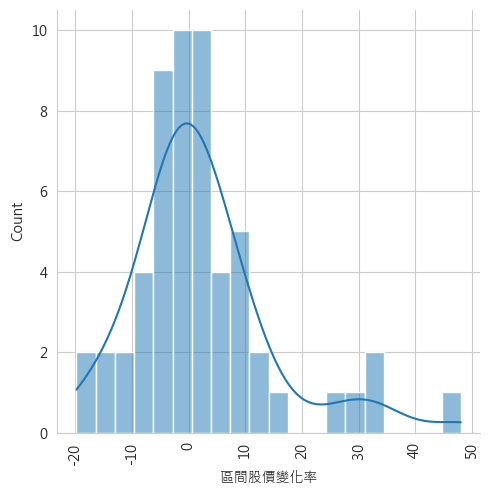

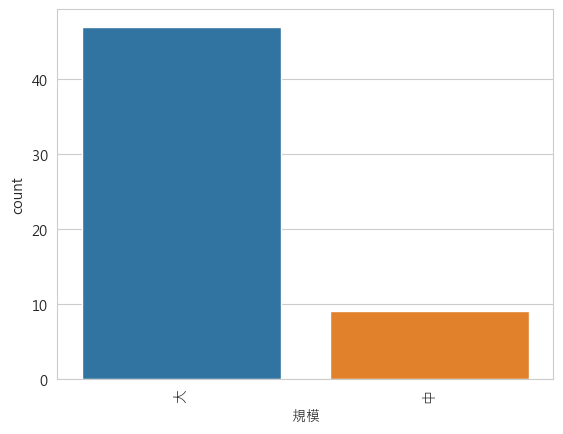

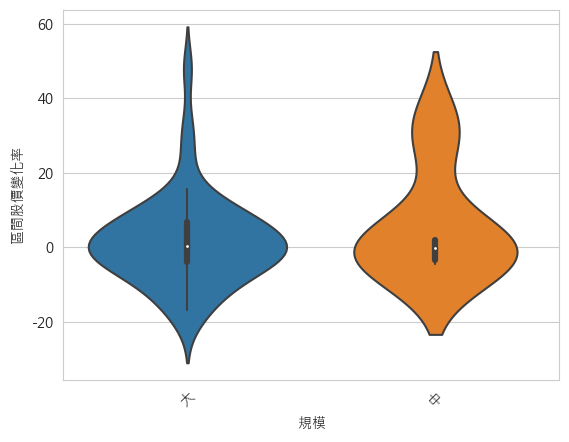

<Figure size 640x480 with 0 Axes>

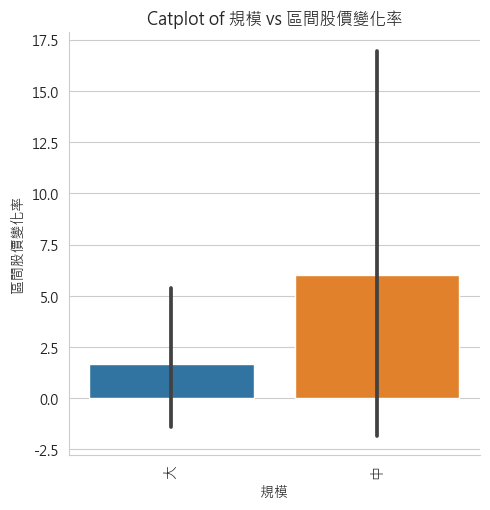

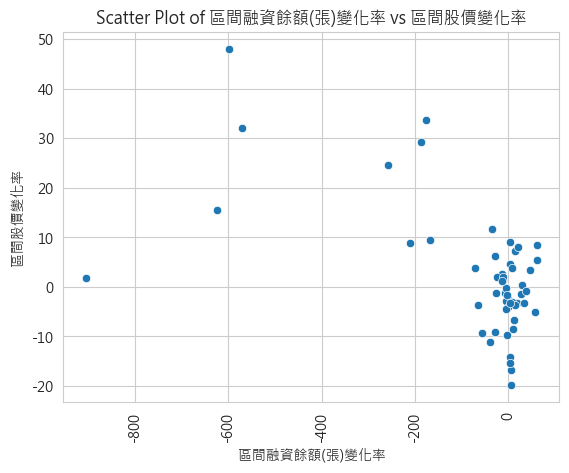

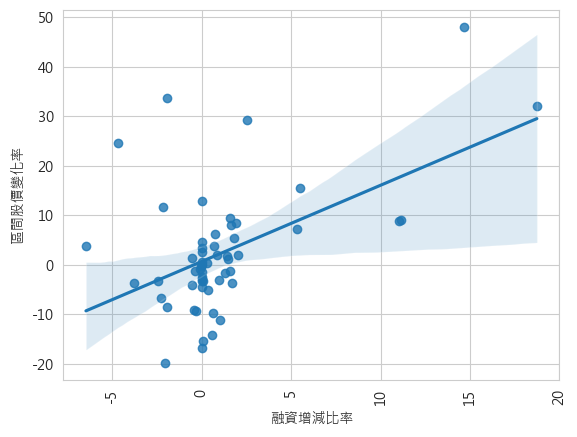

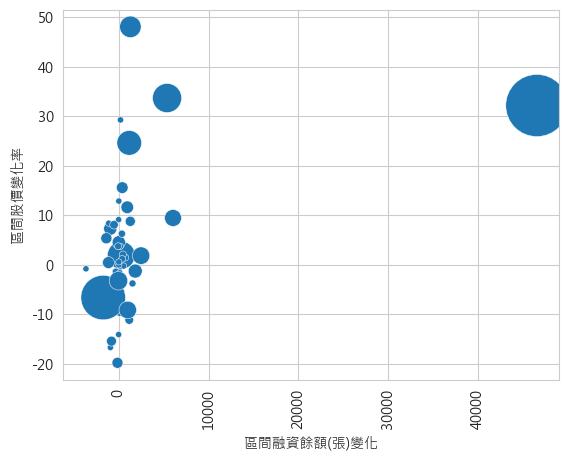

<Figure size 640x480 with 0 Axes>

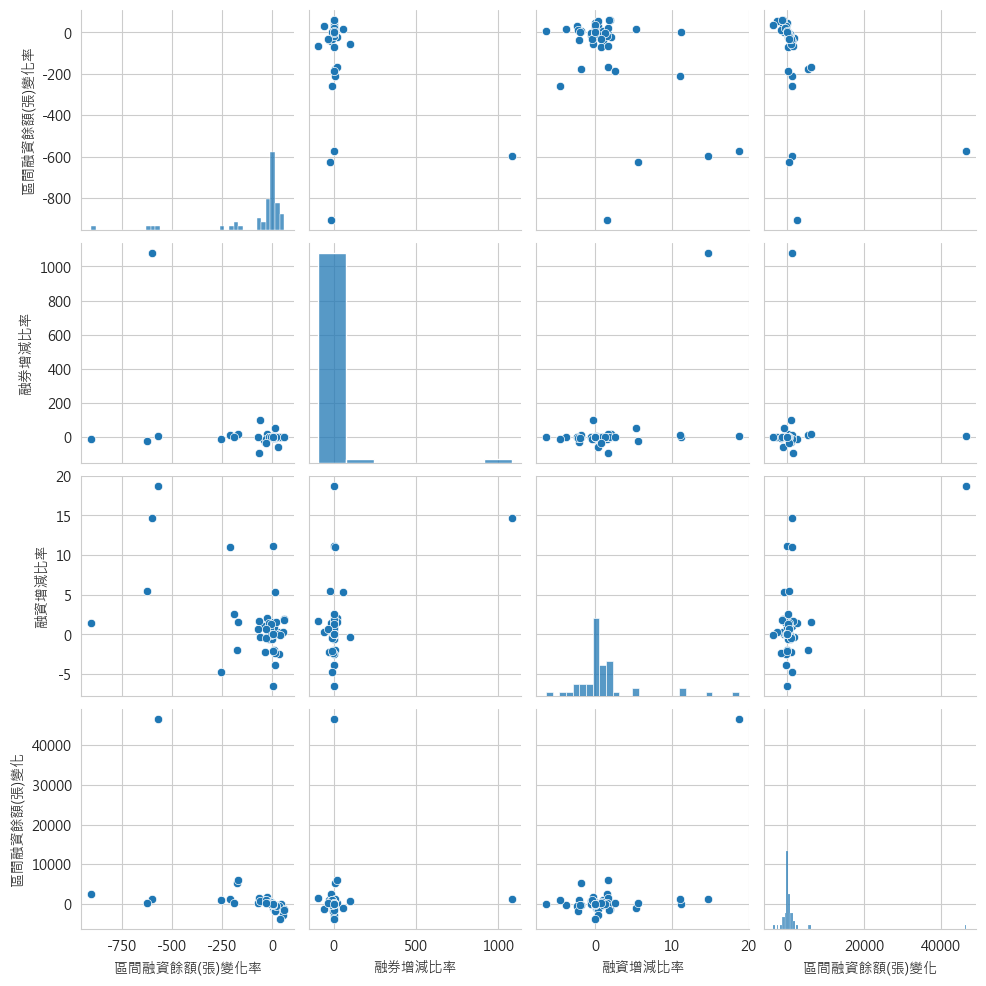

combinations_list
[('區間融資餘額(張)變化率', '融券增減比率', '融資增減比率'), ('區間融資餘額(張)變化率', '融券增減比率', '區間融資餘額(張)變化'), ('區間融資餘額(張)變化率', '融券增減比率', '券資比'), ('區間融資餘額(張)變化率', '融資增減比率', '區間融資餘額(張)變化'), ('區間融資餘額(張)變化率', '融資增減比率', '券資比'), ('區間融資餘額(張)變化率', '區間融資餘額(張)變化', '券資比'), ('融券增減比率', '融資增減比率', '區間融資餘額(張)變化'), ('融券增減比率', '融資增減比率', '券資比'), ('融券增減比率', '區間融資餘額(張)變化', '券資比'), ('融資增減比率', '區間融資餘額(張)變化', '券資比')]
final_combinations
[('區間融資餘額(張)變化率', '融券增減比率', '融資增減比率'), ('融券增減比率', '融資增減比率', '區間融資餘額(張)變化率'), ('融資增減比率', '區間融資餘額(張)變化率', '融券增減比率'), ('區間融資餘額(張)變化率', '融券增減比率', '區間融資餘額(張)變化'), ('融券增減比率', '區間融資餘額(張)變化', '區間融資餘額(張)變化率'), ('區間融資餘額(張)變化', '區間融資餘額(張)變化率', '融券增減比率'), ('區間融資餘額(張)變化率', '融券增減比率', '券資比'), ('融券增減比率', '券資比', '區間融資餘額(張)變化率'), ('券資比', '區間融資餘額(張)變化率', '融券增減比率'), ('區間融資餘額(張)變化率', '融資增減比率', '區間融資餘額(張)變化'), ('融資增減比率', '區間融資餘額(張)變化', '區間融資餘額(張)變化率'), ('區間融資餘額(張)變化', '區間融資餘額(張)變化率', '融資增減比率'), ('區間融資餘額(張)變化率', '融資增減比率', '券資比'), ('融資增減比率', '券資比', '區間融資餘額(張)變化率'), ('券資比', '區間融資餘額(張)變化率', '融資增減比率'), ('區間融資餘額(張)

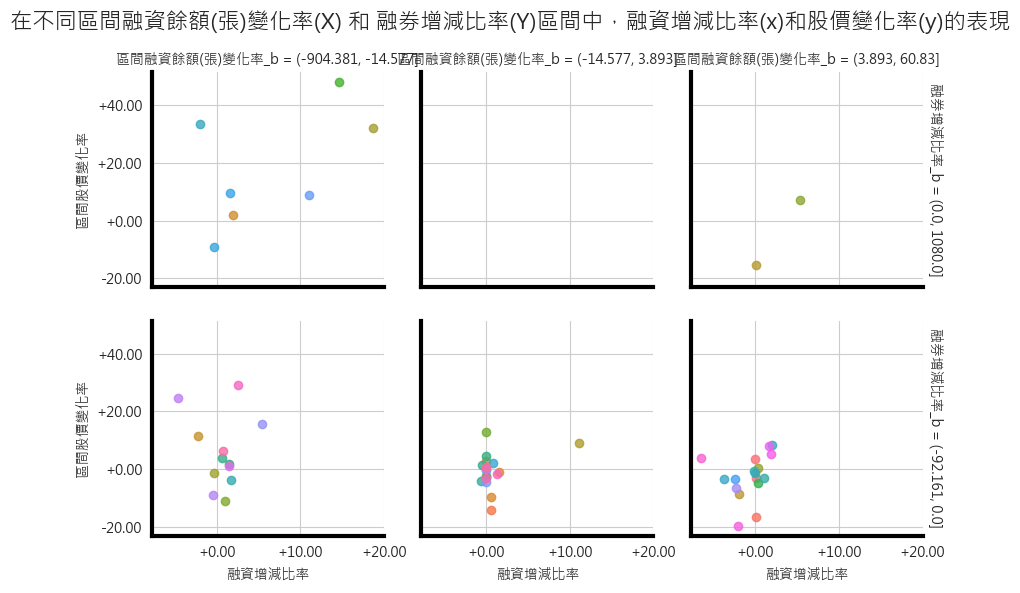

融券增減比率_b
融資增減比率_b


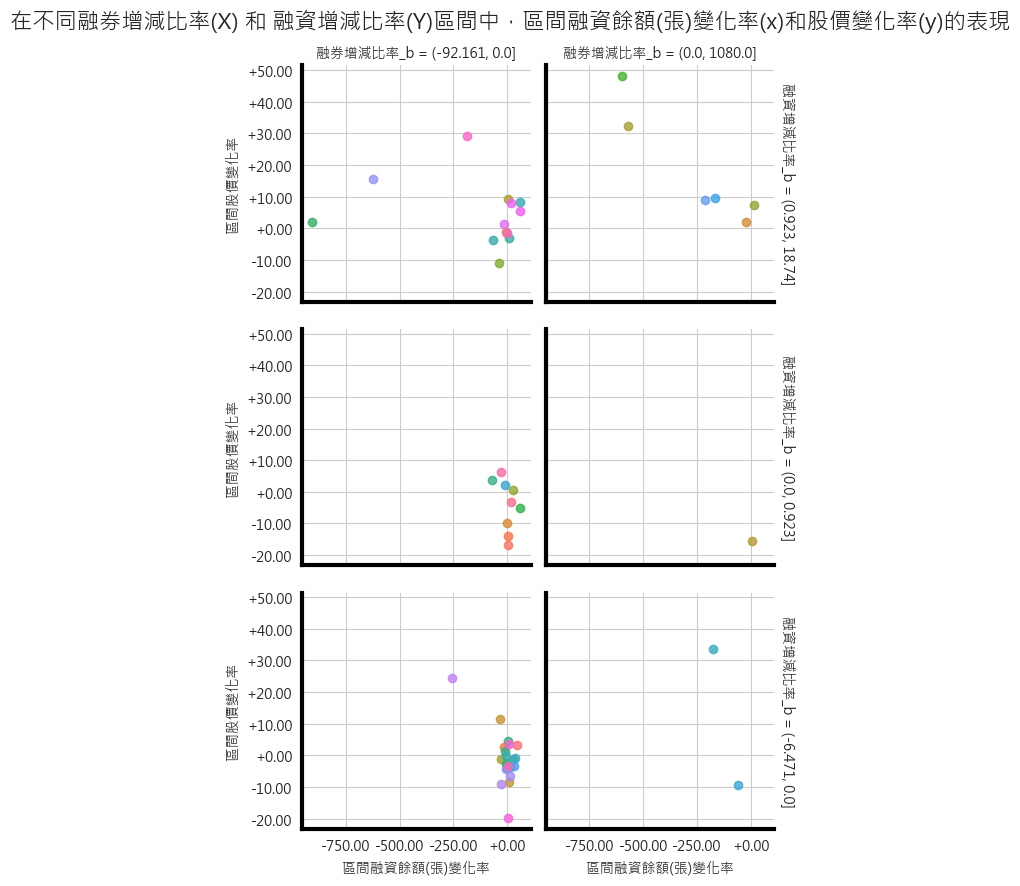

融資增減比率_b
區間融資餘額(張)變化率_b


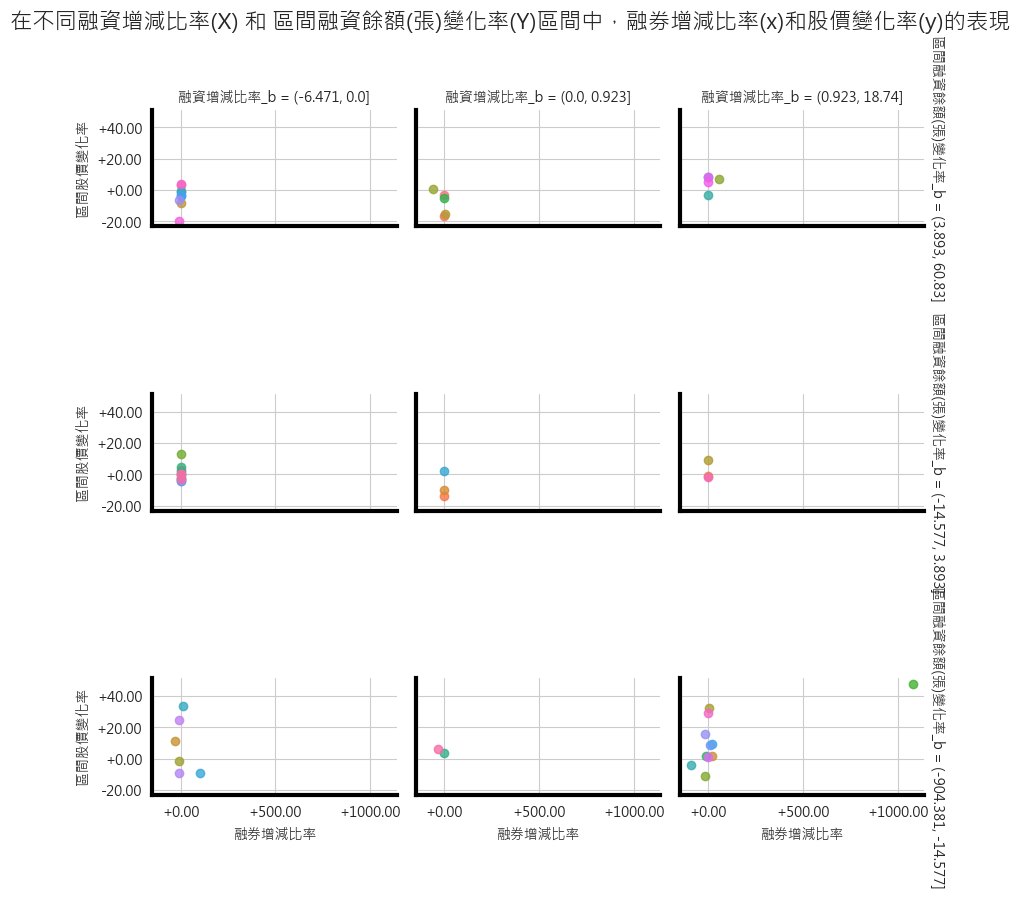

區間融資餘額(張)變化率_b
融券增減比率_b


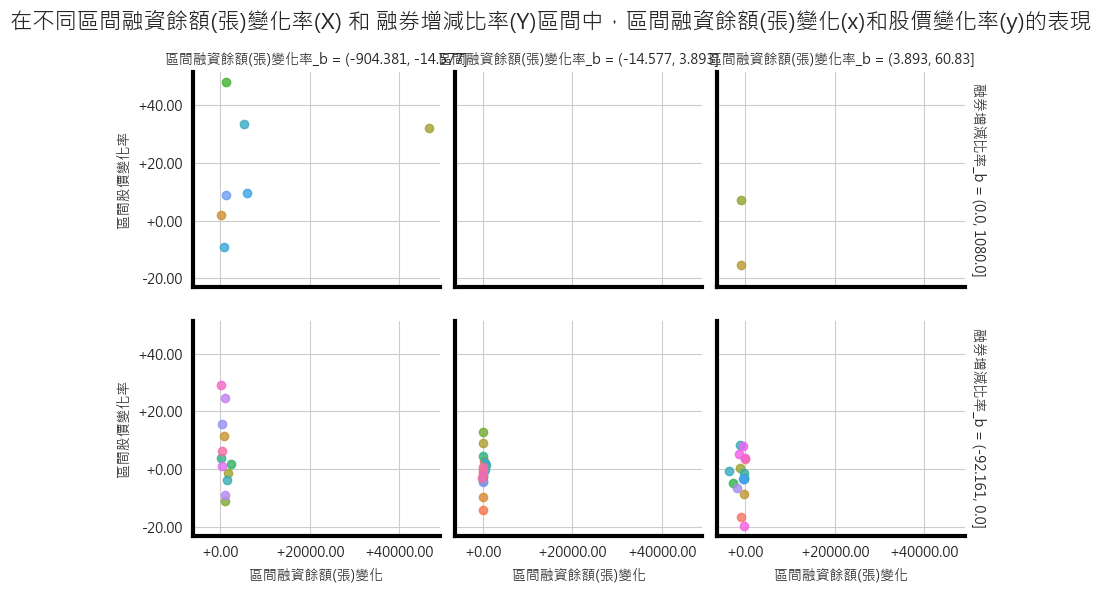

融券增減比率_b
區間融資餘額(張)變化_b


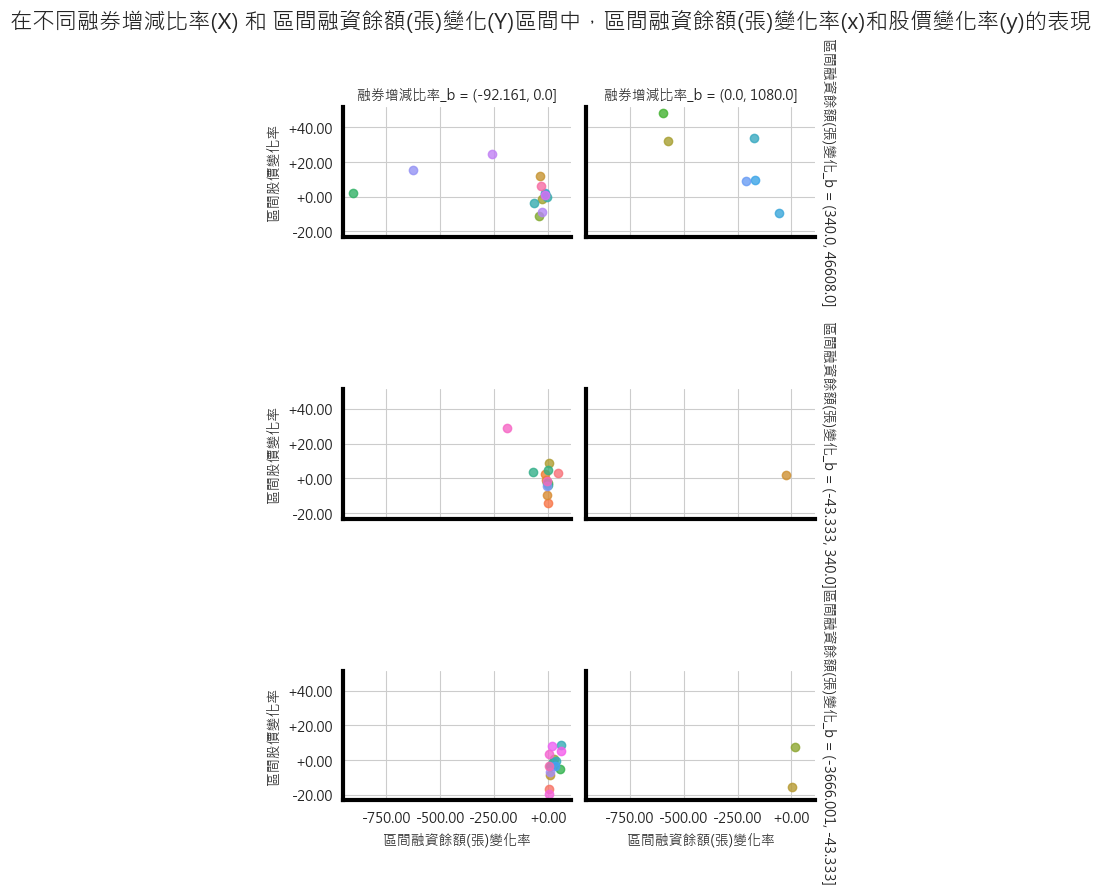

區間融資餘額(張)變化_b
區間融資餘額(張)變化率_b


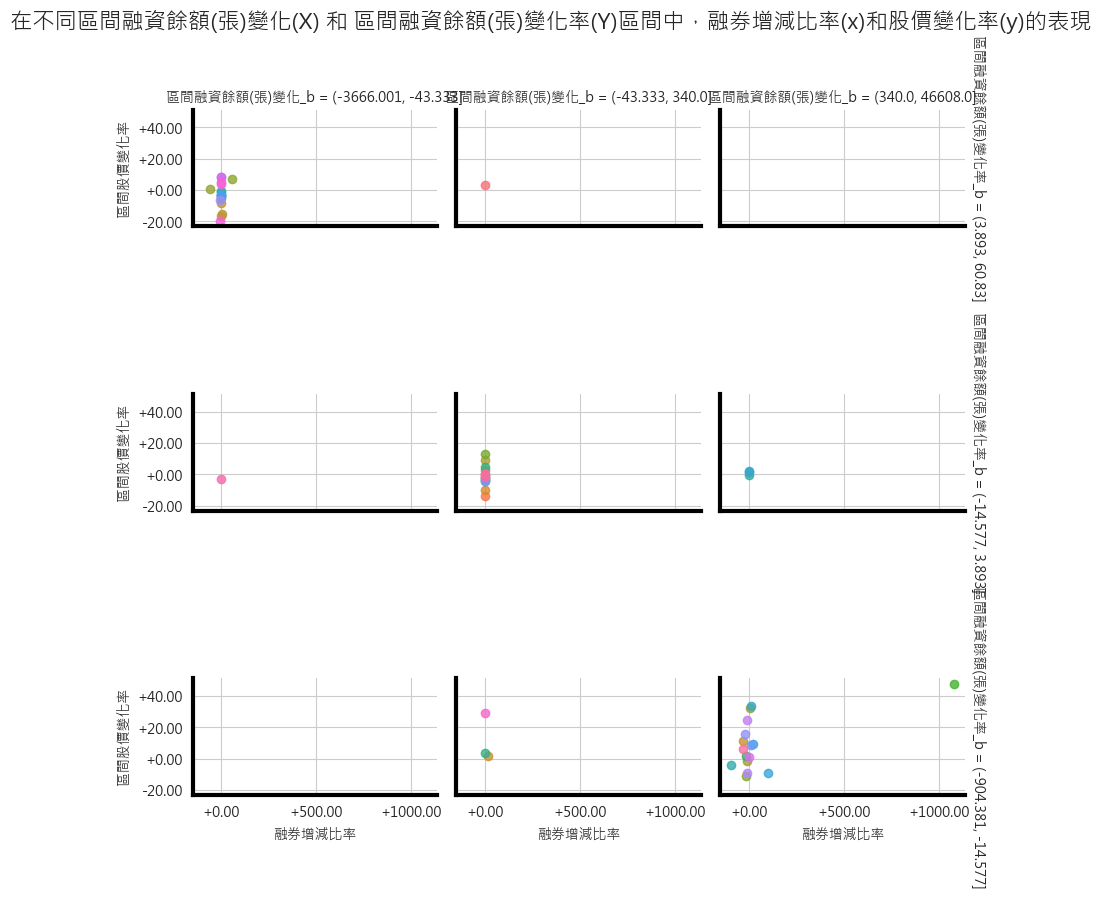

區間融資餘額(張)變化率_b
融券增減比率_b


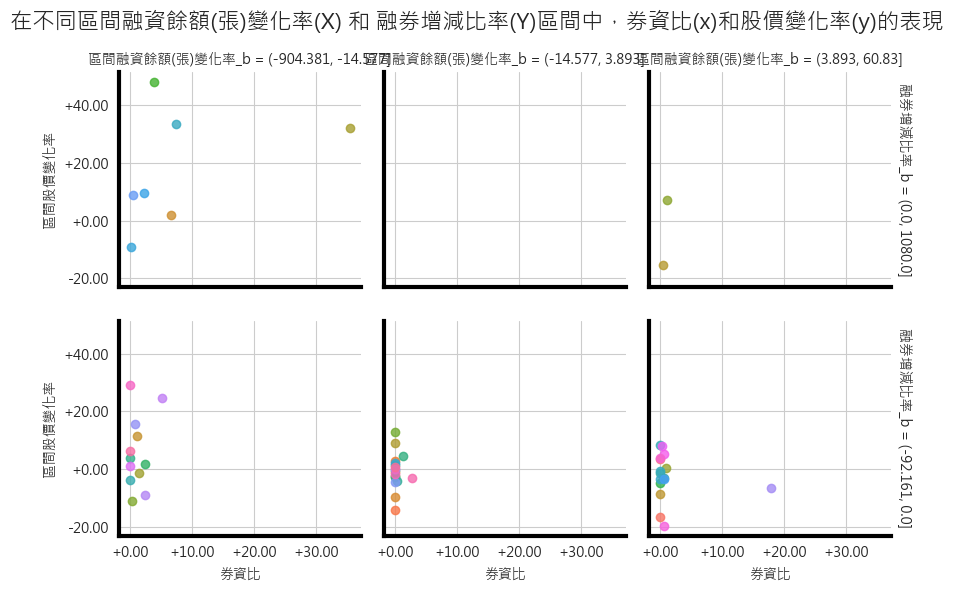

融券增減比率_b
券資比_b


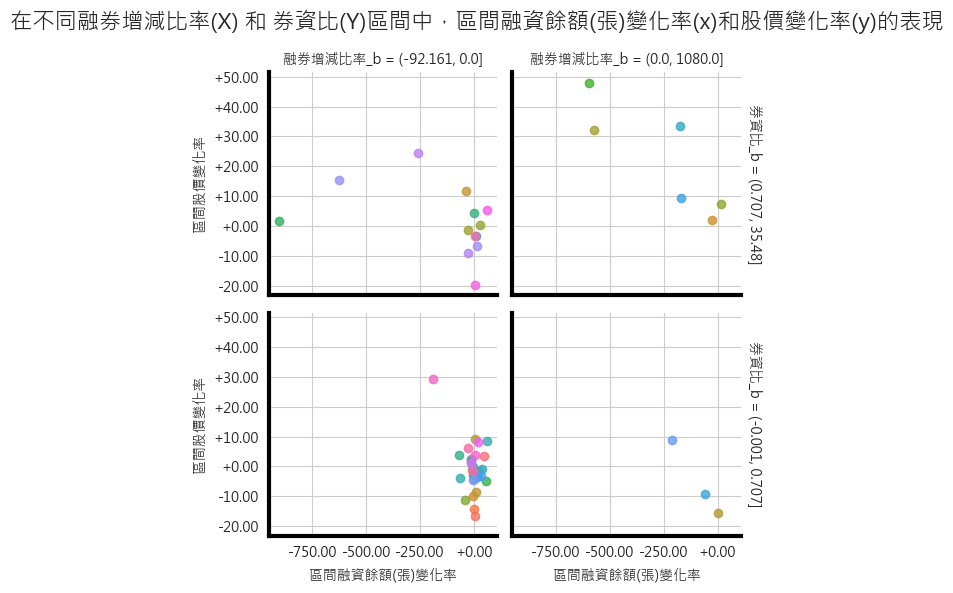

券資比_b
區間融資餘額(張)變化率_b


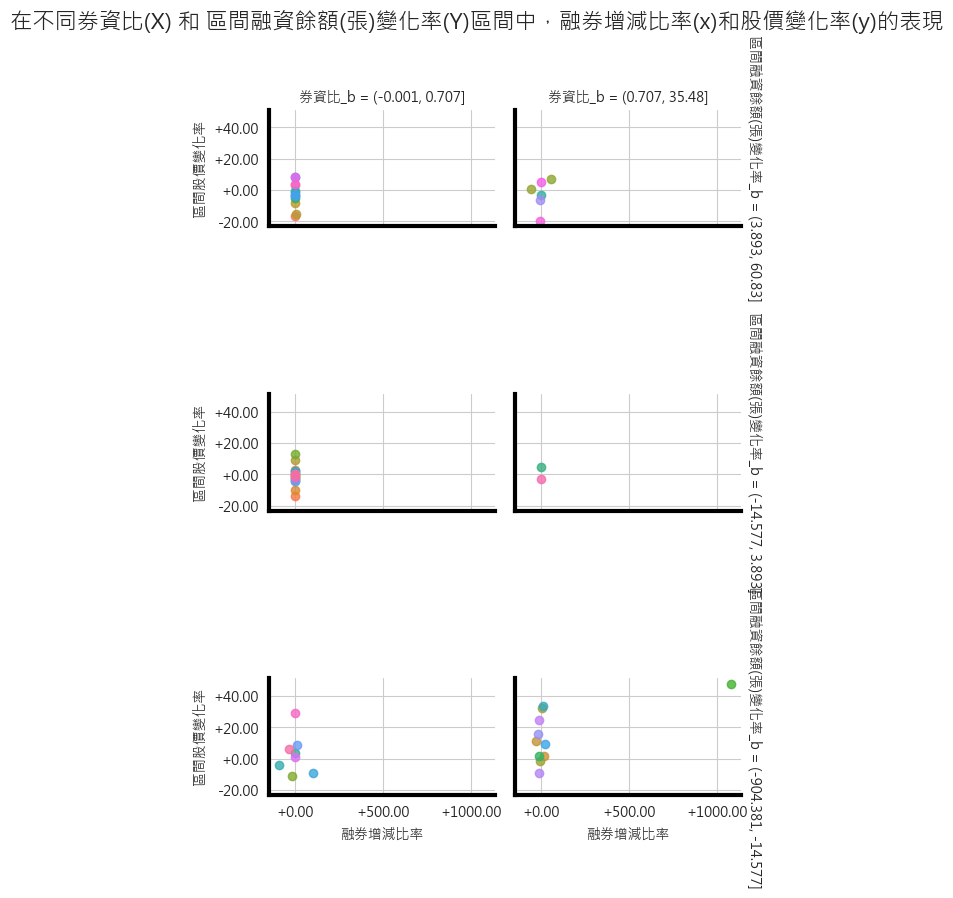

區間融資餘額(張)變化率_b
融資增減比率_b


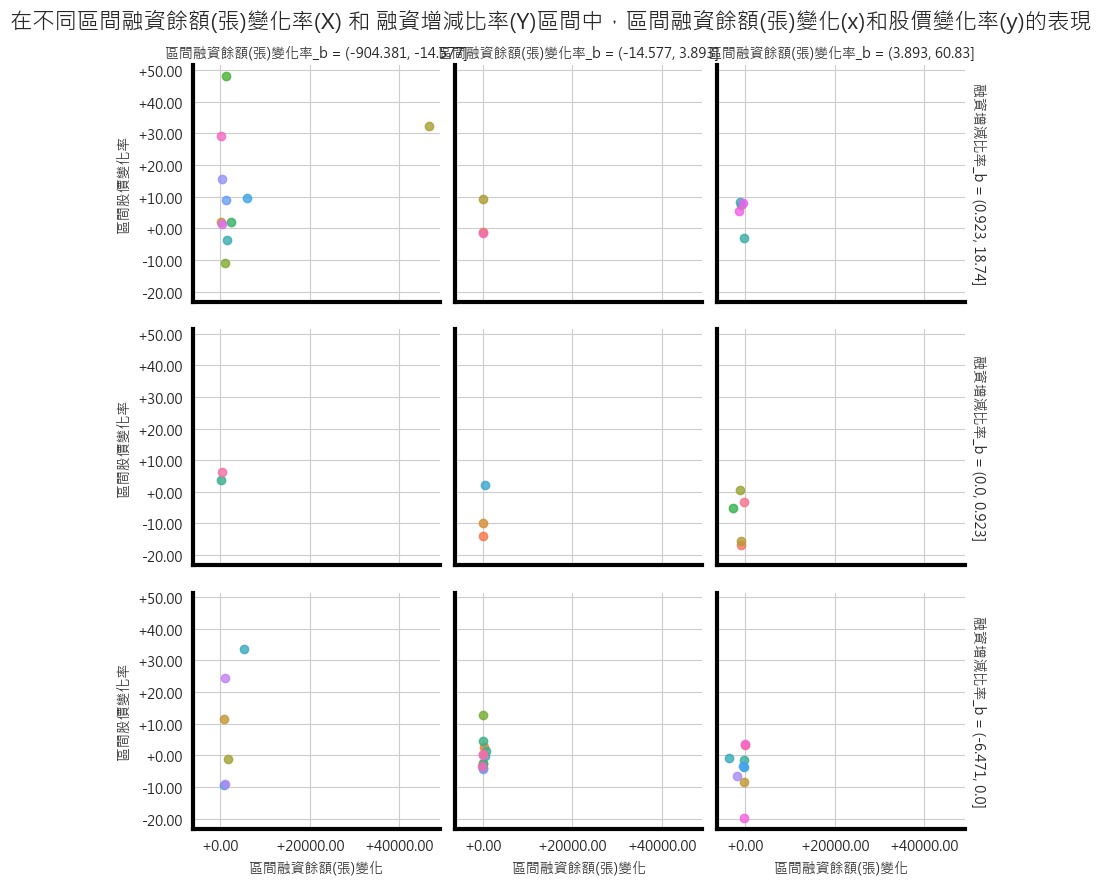

融資增減比率_b
區間融資餘額(張)變化_b


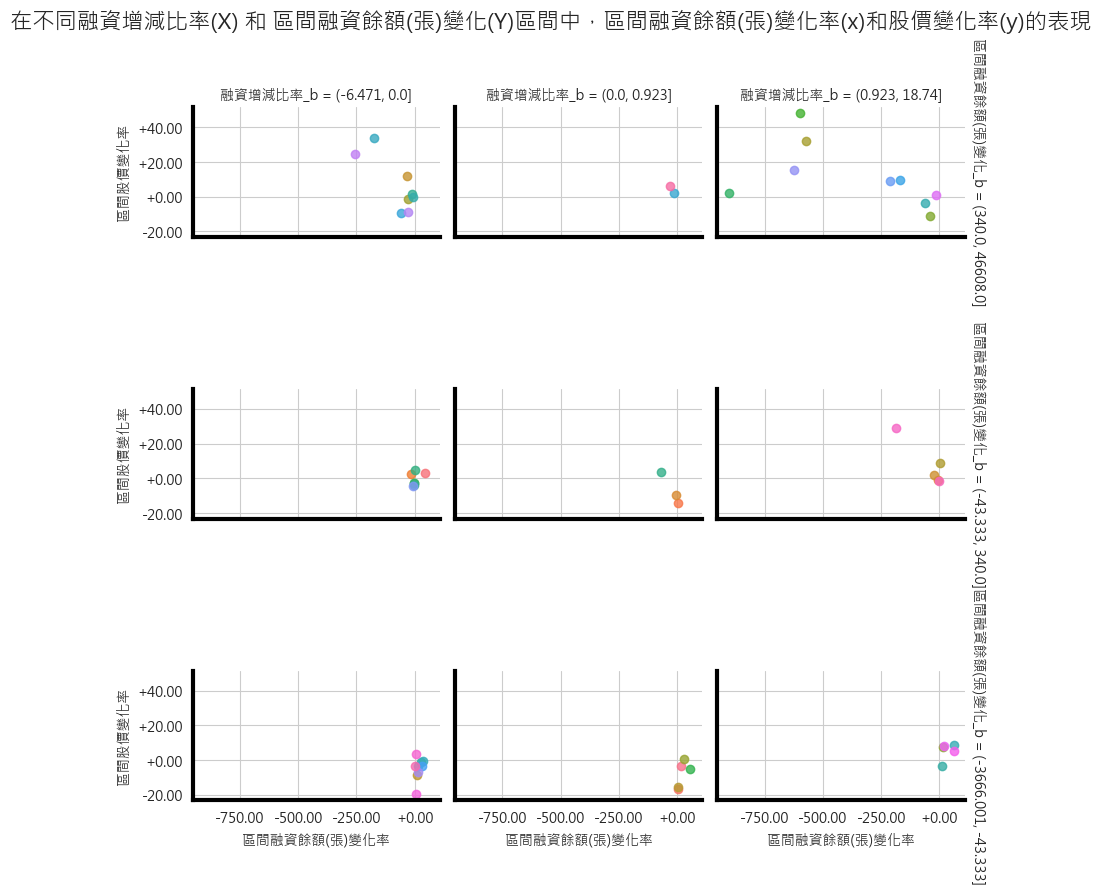

區間融資餘額(張)變化_b
區間融資餘額(張)變化率_b


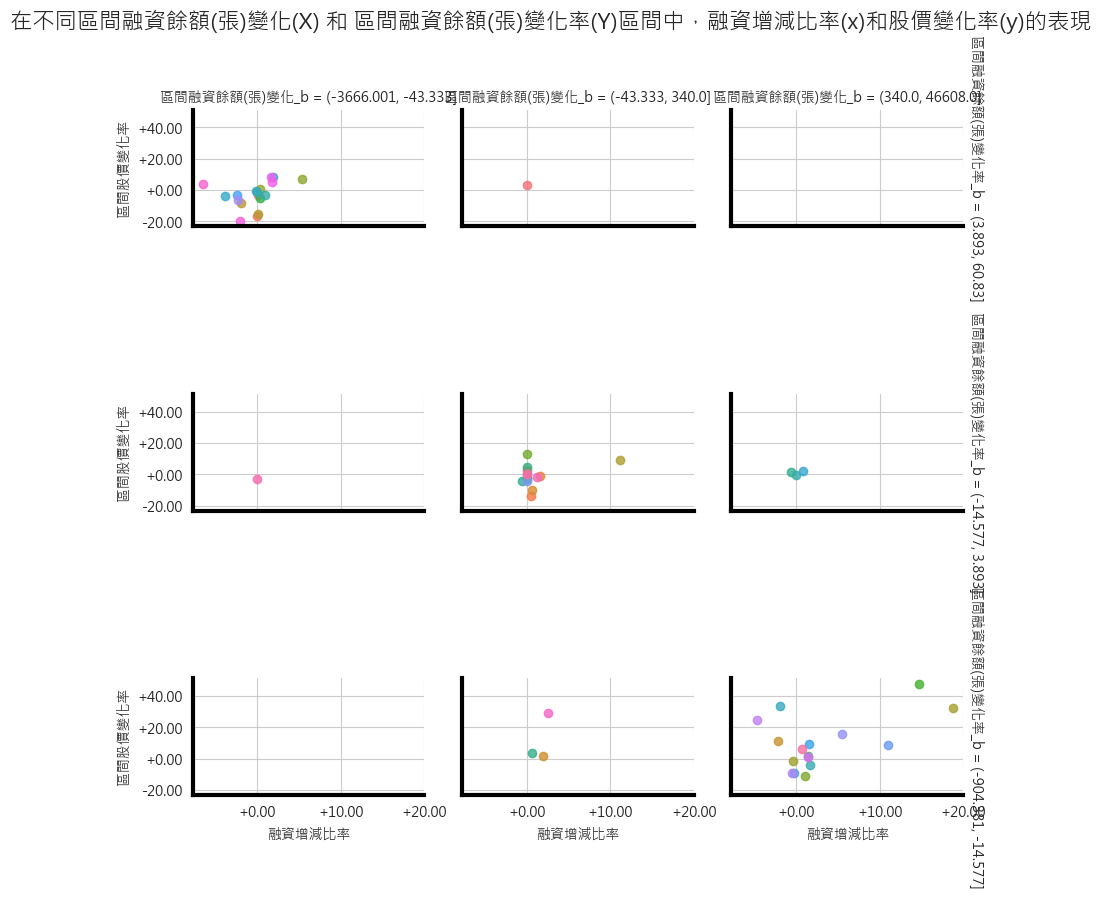

區間融資餘額(張)變化率_b
融資增減比率_b


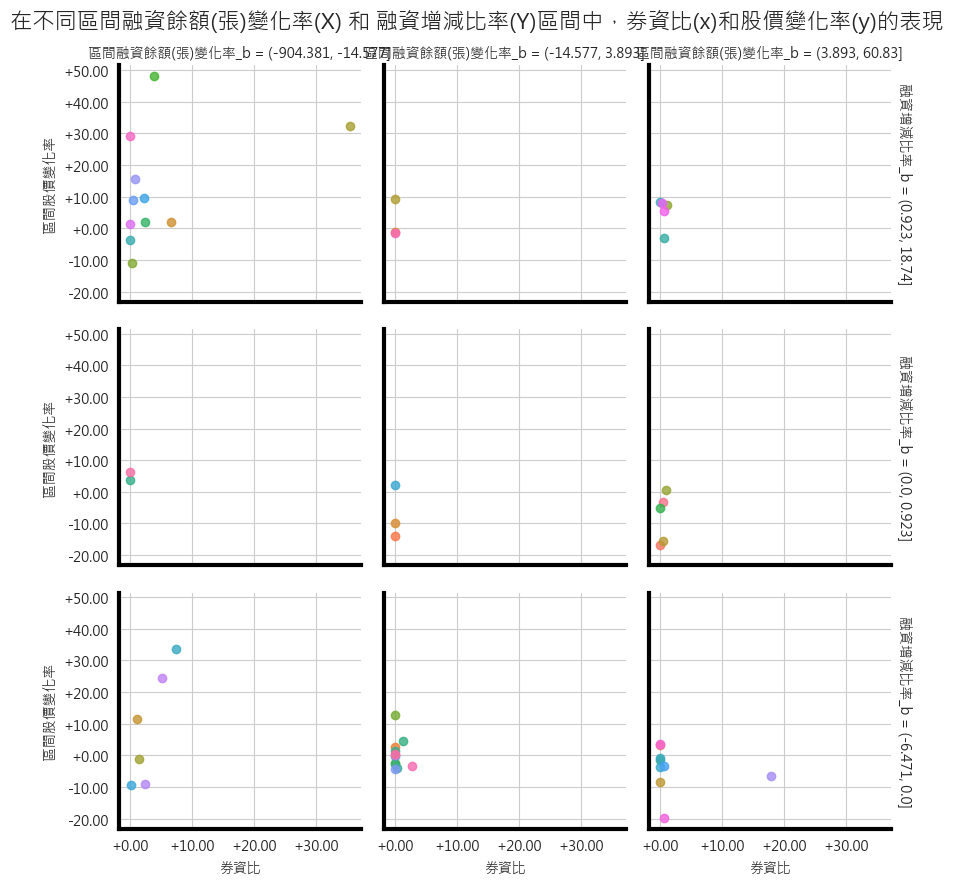

融資增減比率_b
券資比_b


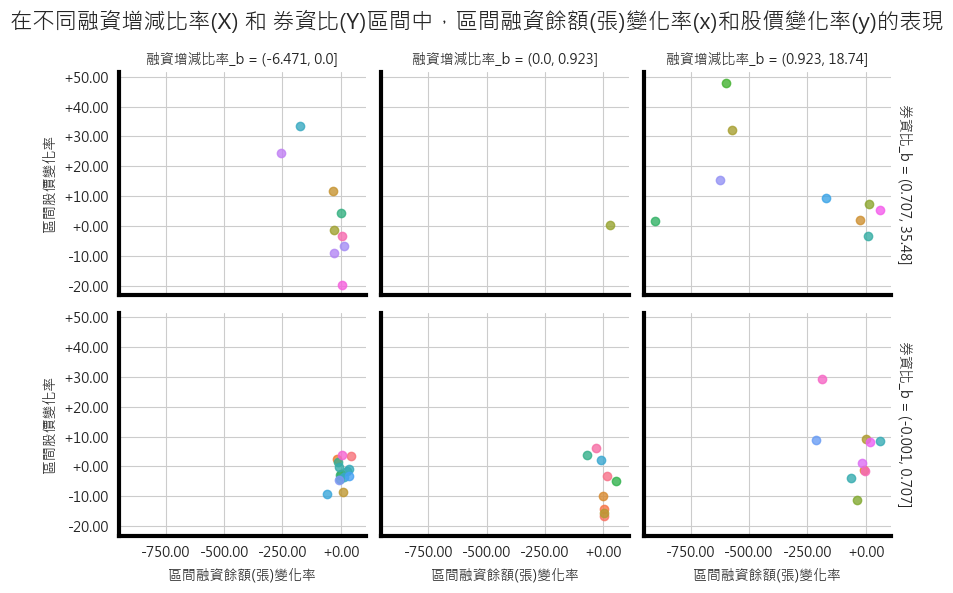

券資比_b
區間融資餘額(張)變化率_b


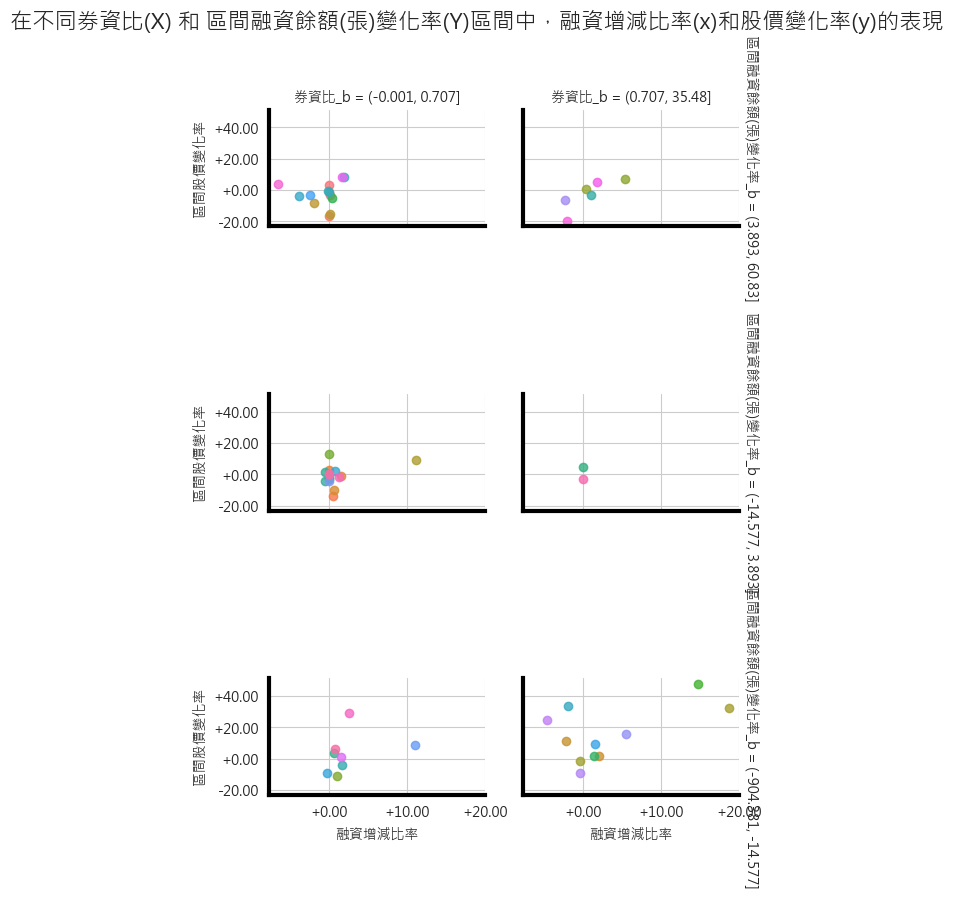

區間融資餘額(張)變化率_b
區間融資餘額(張)變化_b


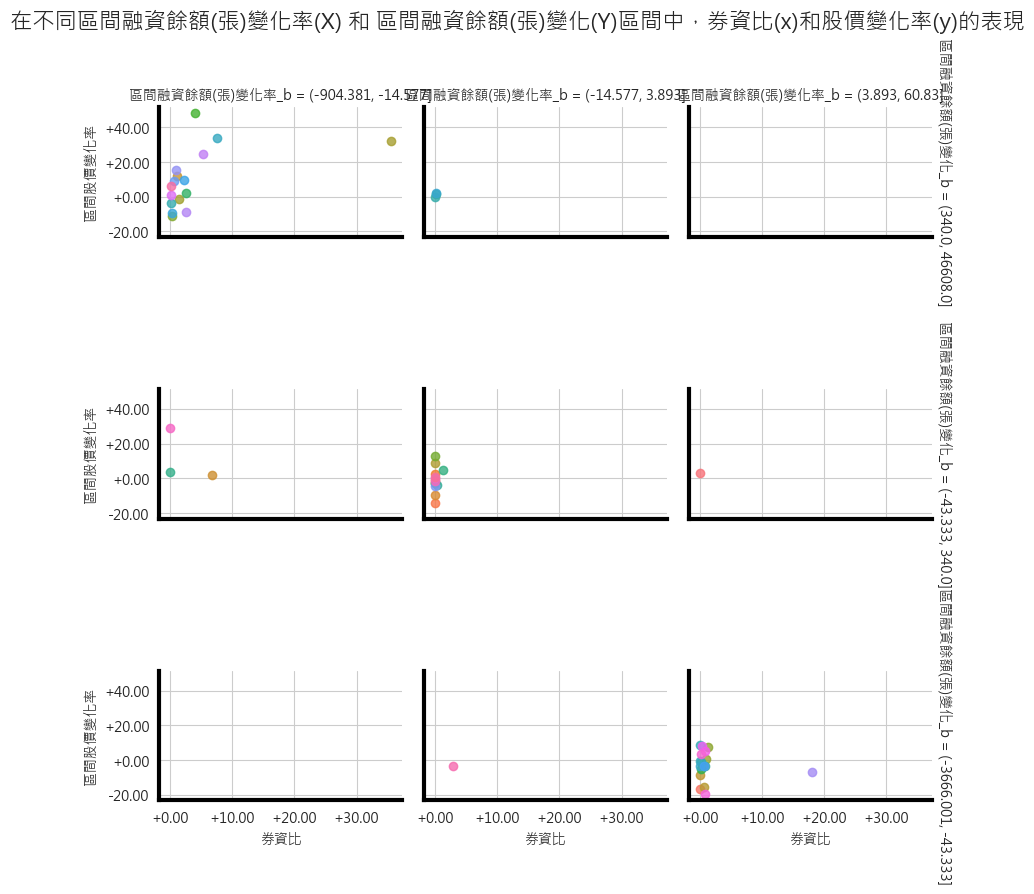

區間融資餘額(張)變化_b
券資比_b


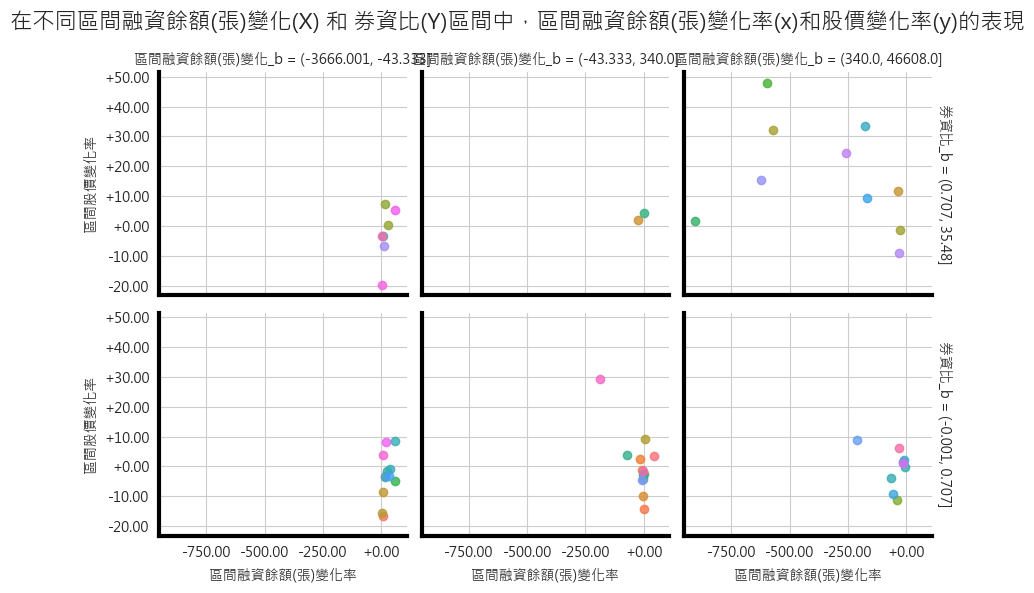

券資比_b
區間融資餘額(張)變化率_b


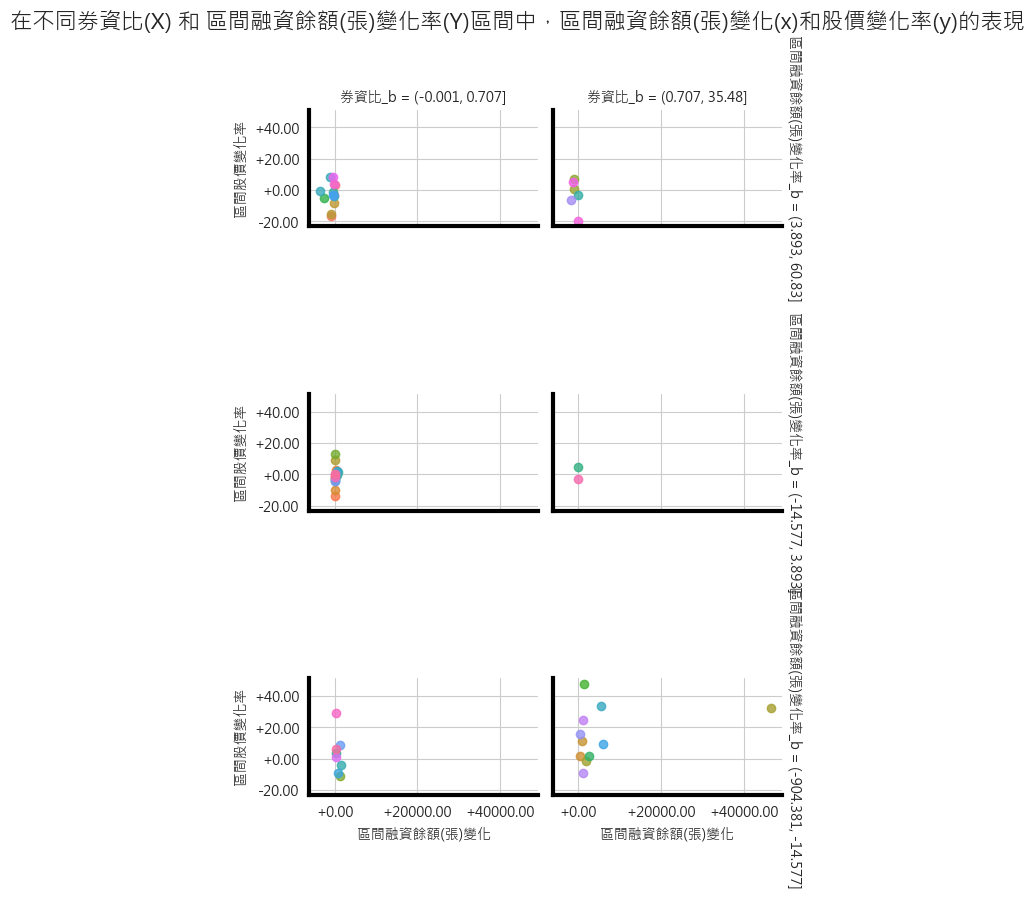

融券增減比率_b
融資增減比率_b


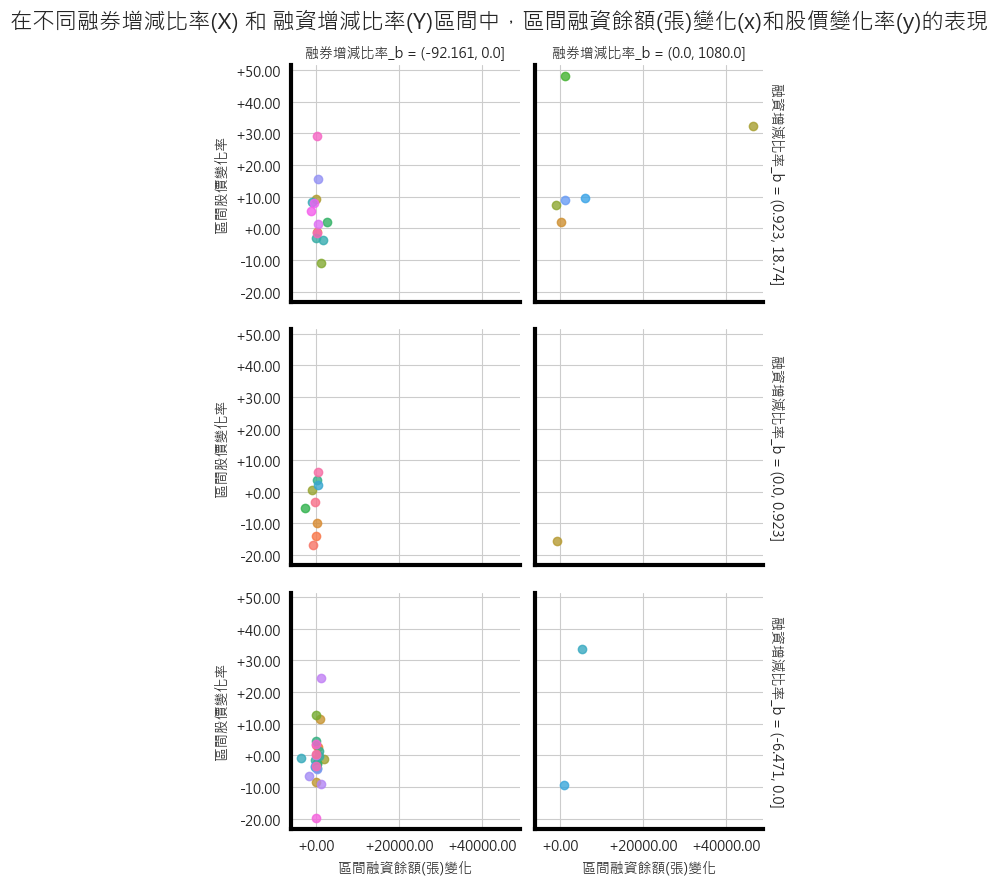

融資增減比率_b
區間融資餘額(張)變化_b


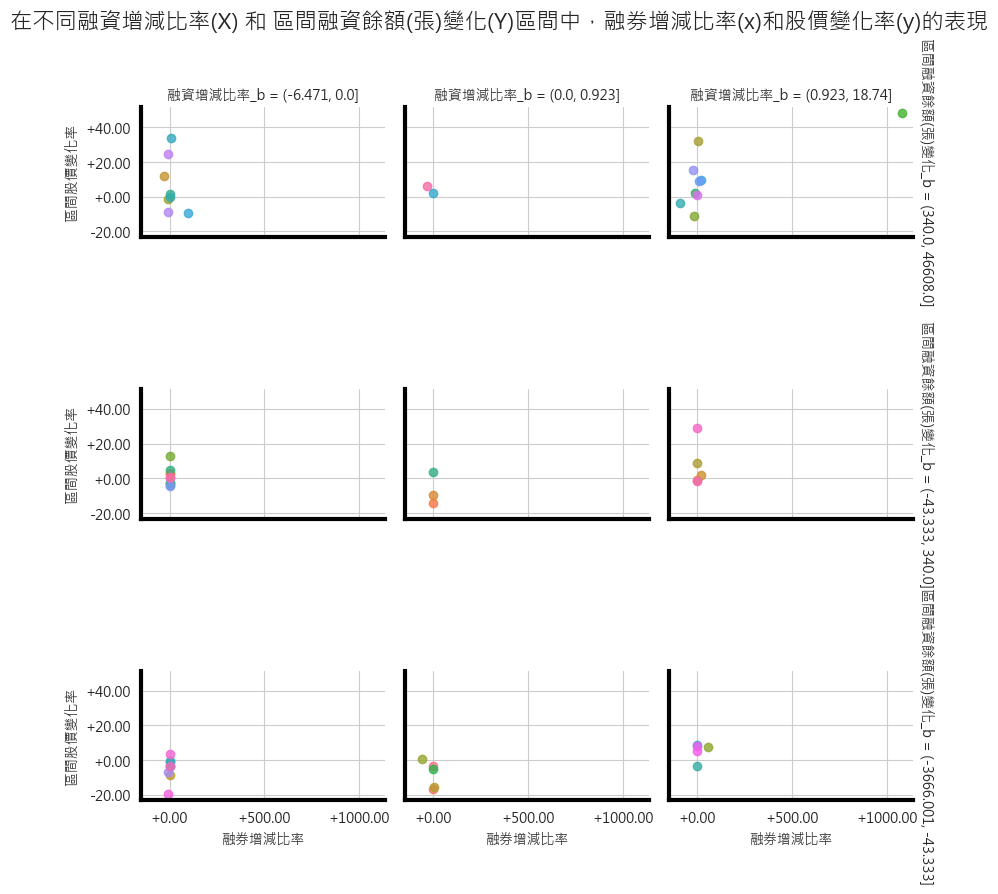

區間融資餘額(張)變化_b
融券增減比率_b


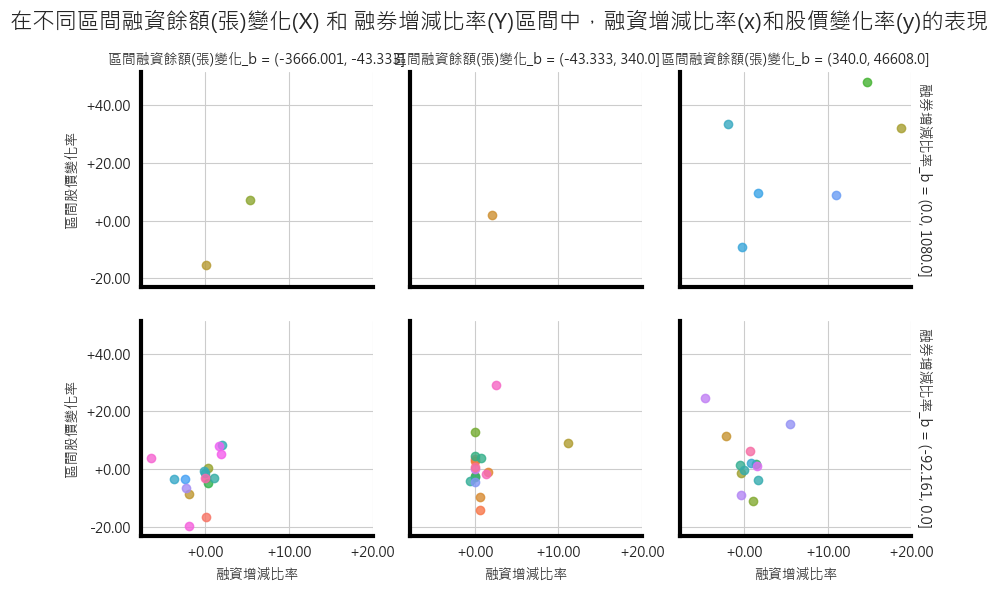

融券增減比率_b
融資增減比率_b


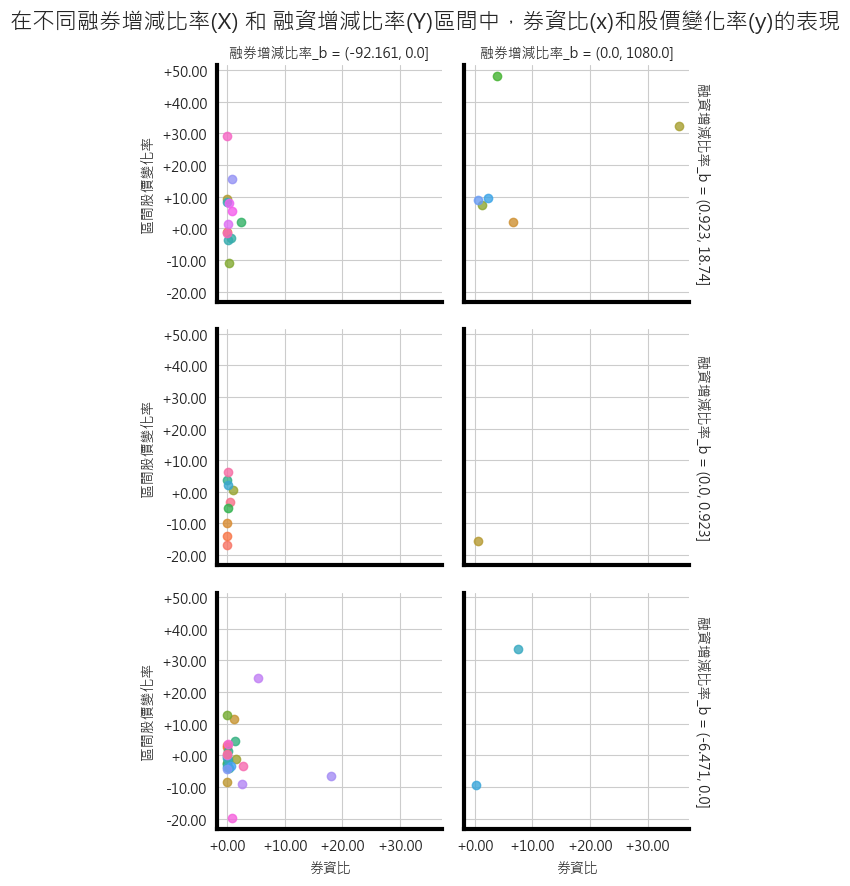

融資增減比率_b
券資比_b


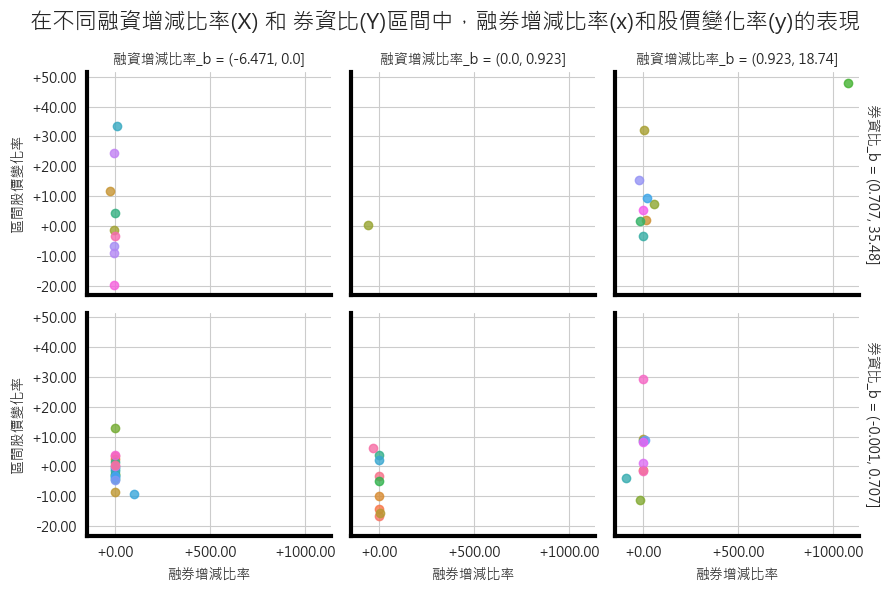

券資比_b
融券增減比率_b


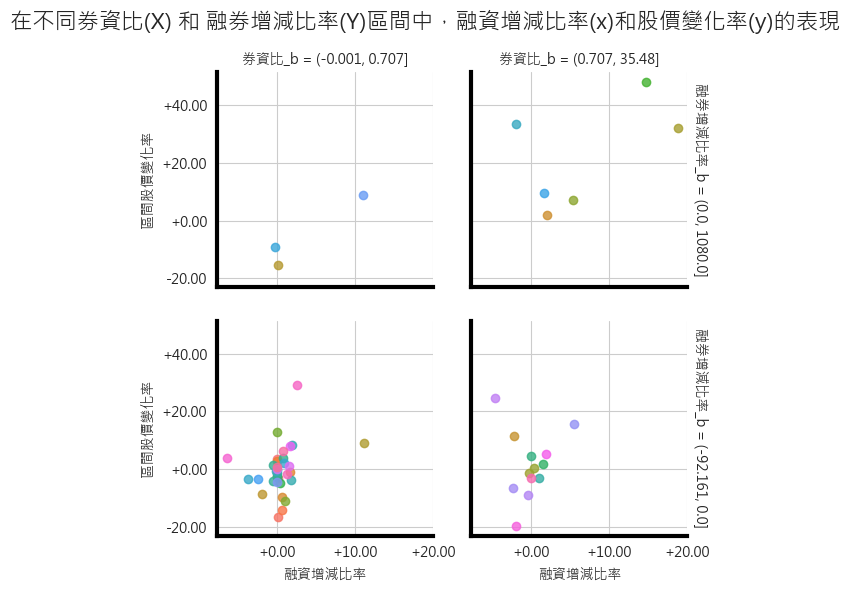

融券增減比率_b
區間融資餘額(張)變化_b


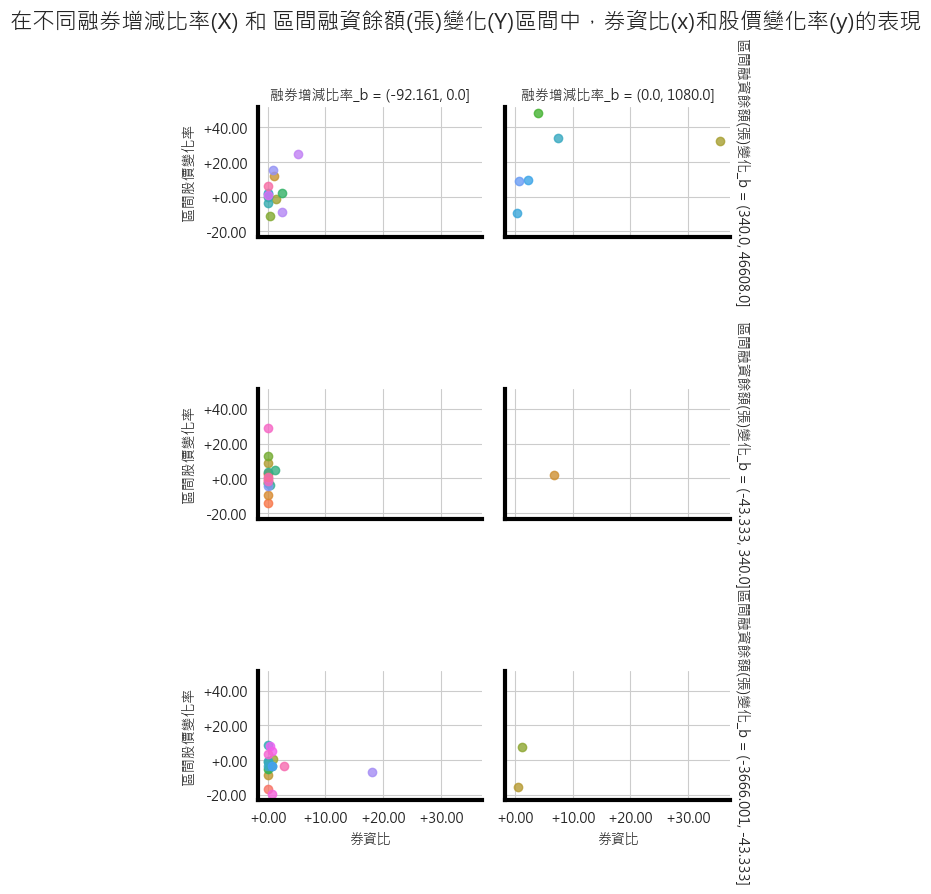

區間融資餘額(張)變化_b
券資比_b


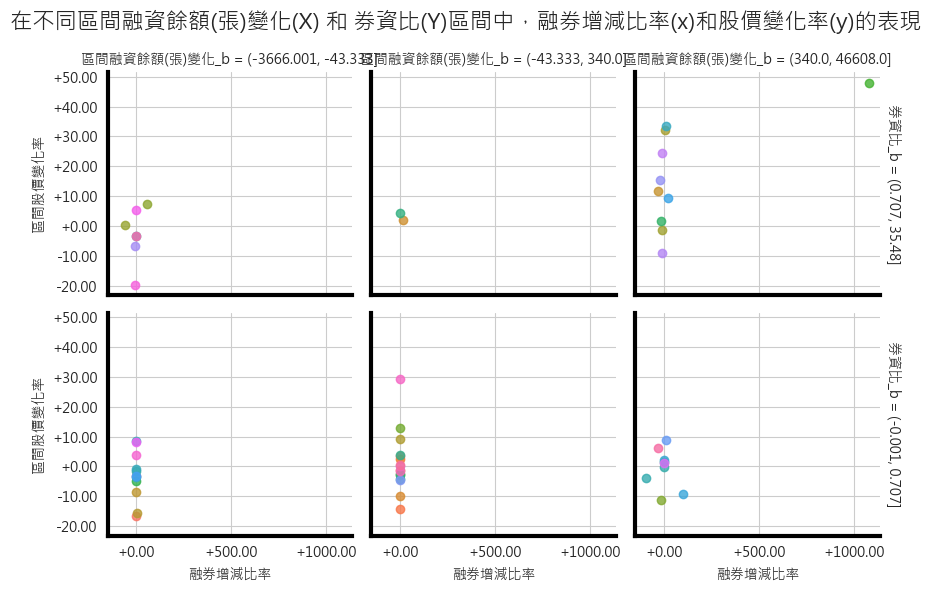

券資比_b
融券增減比率_b


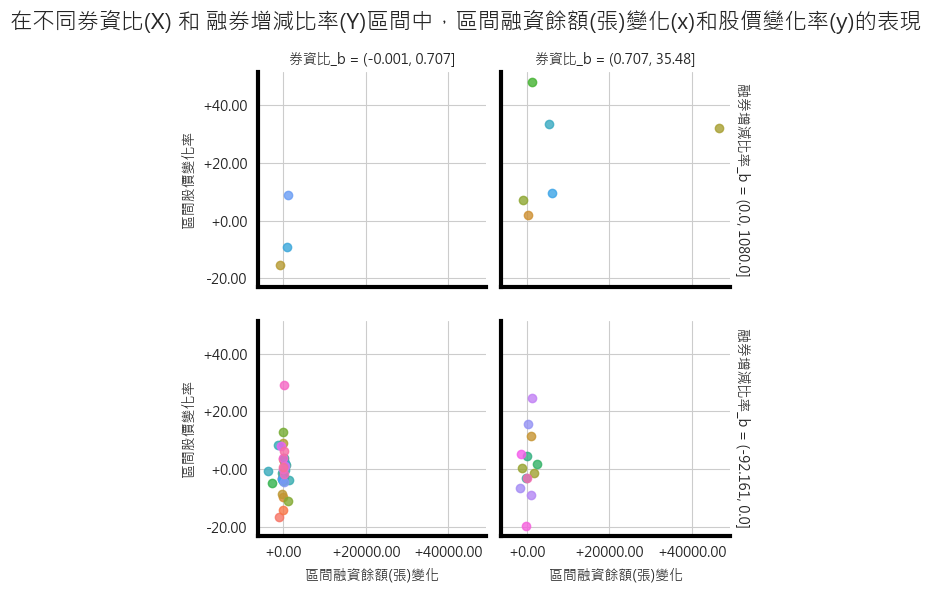

融資增減比率_b
區間融資餘額(張)變化_b


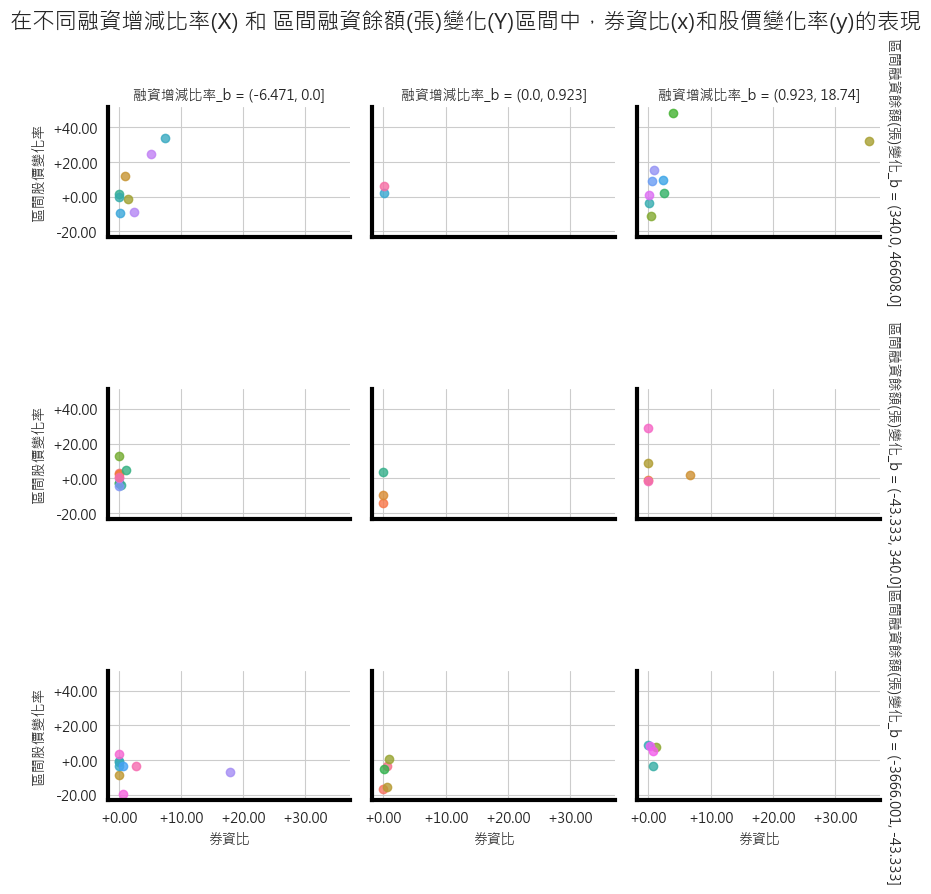

區間融資餘額(張)變化_b
券資比_b


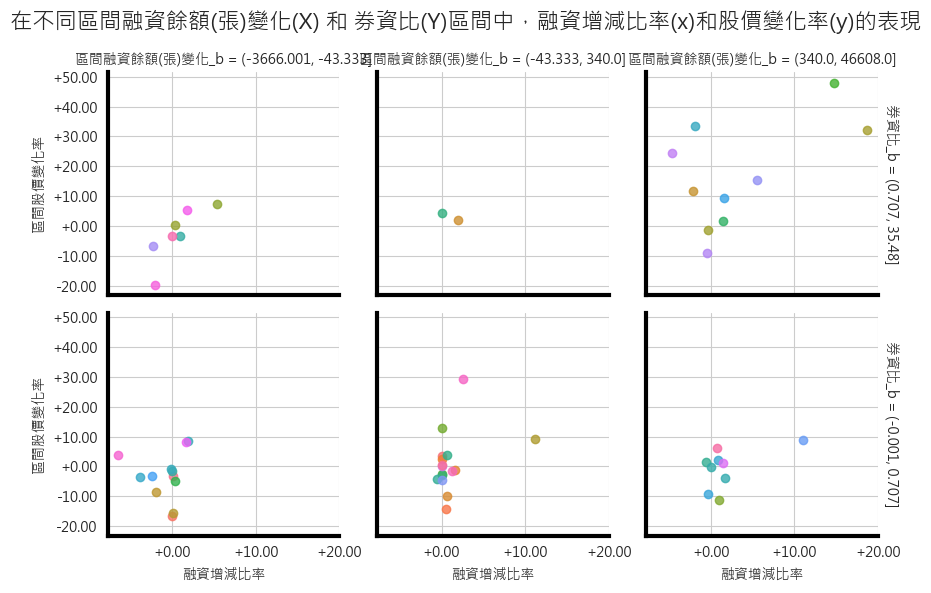

券資比_b
融資增減比率_b


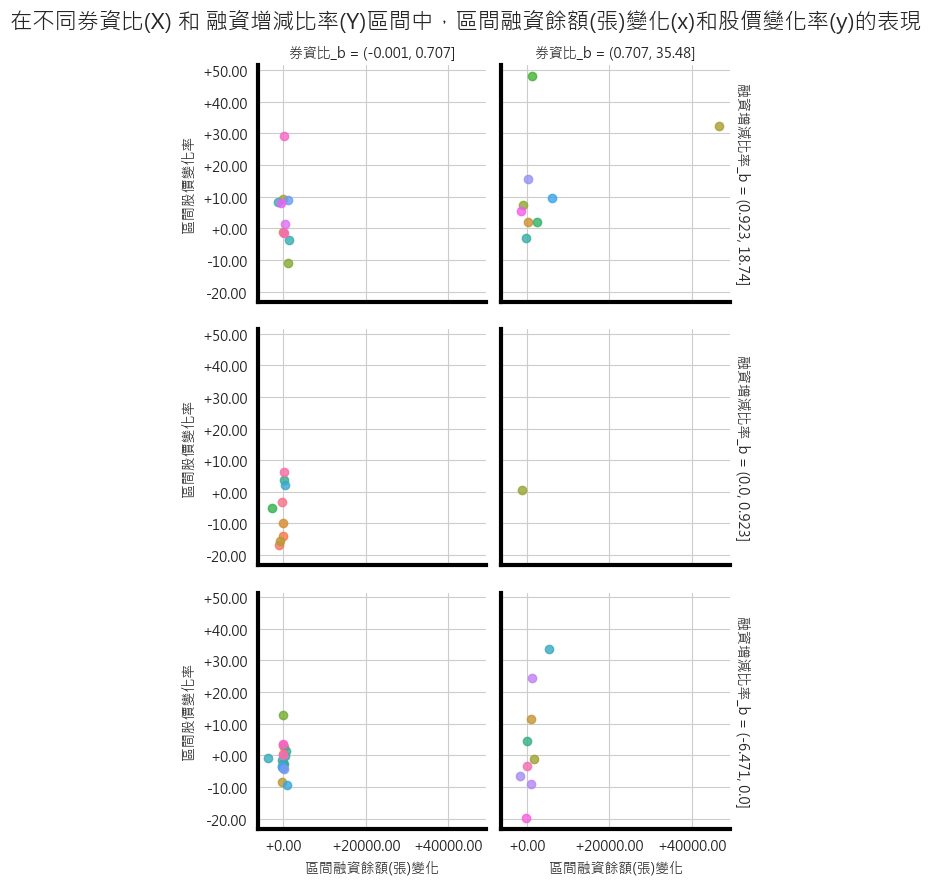

所有圖表已保存到 output_plots.pdf


In [7]:
F_Draw(filtered_data,features)